In [4]:
import os
print(os.path)

<module 'ntpath' from 'd:\\Users\\joshu\\anaconda3\\lib\\ntpath.py'>


In [5]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

# 获取2016-2017赛季比赛数据
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable="2016-17")
games = gamefinder.get_data_frames()[0]

# 保存为CSV文件
games_file = "C:\\Users\joshu\Documents\\UCI\\STATS295\\nba_games_2016_2017_detailed.csv"
games.to_csv(games_file, index=False, encoding="utf-8-sig")

print(f"比赛数据抓取完成，已保存到文件：{games_file}")

比赛数据抓取完成，已保存到文件：C:\Users\joshu\Documents\UCI\STATS295\nba_games_2016_2017_detailed.csv


In [6]:
from nba_api.stats.endpoints import playergamelogs

# 获取2016-2017赛季球员数据
player_logs = playergamelogs.PlayerGameLogs(season_nullable="2016-17")
players_df = player_logs.get_data_frames()[0]

# 保存为CSV文件
players_file = "nba_players_2016_2017.csv"
players_df.to_csv(players_file, index=False, encoding="utf-8-sig")

print(f"球员数据抓取完成，已保存到文件：{players_file}")

球员数据抓取完成，已保存到文件：nba_players_2016_2017.csv


In [8]:
# Step 1: Import necessary libraries / 第一步：导入必要的库
import pandas as pd

# Step 2: Load the dataset / 第二步：加载数据集
file_path = "C:\\Users\joshu\Documents\\UCI\\STATS295\\nba_games_2016_2017_detailed.csv"
nba_data = pd.read_csv(file_path)

# Step 3: Check for missing values / 第三步：检查缺失值
print("Missing values summary: / 缺失值统计：")
print(nba_data.isnull().sum())

# Remove rows with missing values in critical columns / 删除关键列中含缺失值的行
nba_data.dropna(subset=['WL', 'FG3_PCT', 'FT_PCT'], inplace=True)

# Step 4: Convert data types / 第四步：转换数据类型
# Convert GAME_DATE to datetime / 将 GAME_DATE 转换为日期格式
nba_data['GAME_DATE'] = pd.to_datetime(nba_data['GAME_DATE'])

# Step 5: Create target variable HOME_WIN / 第五步：生成目标变量 HOME_WIN
# HOME_WIN is 1 if the team is the home team and wins the game; otherwise, 0
# 如果球队是主队且获胜，则 HOME_WIN = 1；否则为 0
nba_data['HOME_WIN'] = nba_data.apply(
    lambda row: 1 if "vs." in row['MATCHUP'] and row['WL'] == "W" else 0, axis=1
)
nba_data['HOME'] = nba_data.apply(
    lambda row: 1 if "vs." in row['MATCHUP'] else 0, axis=1
)

nba_data['WL'] = nba_data.apply(
    lambda row: 1 if row['WL'] == "W" else 0, axis=1
)
# Step 6: Drop unnecessary columns / 第六步：删除无用列
columns_to_drop = ['SEASON_ID', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID']
nba_data_cleaned = nba_data.drop(columns=columns_to_drop)

# Step 7: Check for duplicate rows / 第七步：检查重复值
nba_data_cleaned.drop_duplicates(inplace=True)

# Step 8: Inspect cleaned data / 第八步：检查清洗后的数据
print("Cleaned dataset summary: / 清洗后的数据集信息：")
nba_data_cleaned.info()
print(nba_data_cleaned.head())

# 保存为CSV文件
# Ensure nba_data_cleaned is a DataFrame / 确保 nba_data_cleaned 是一个数据框
cleaned_file_path = "nba_games_cleaned.csv"
nba_data_cleaned.to_csv(cleaned_file_path, index=False, encoding="utf-8-sig")
print(f"Cleaned data has been saved to {cleaned_file_path} / 清洗后的数据已保存至 {cleaned_file_path}")


Missing values summary: / 缺失值统计：
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   1
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              1
FTM                  0
FTA                  0
FT_PCT               1
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
dtype: int64
Cleaned dataset summary: / 清洗后的数据集信息：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3976 entries, 0 to 3976
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TEAM_ABBREVIATION  3976 non-null   object        


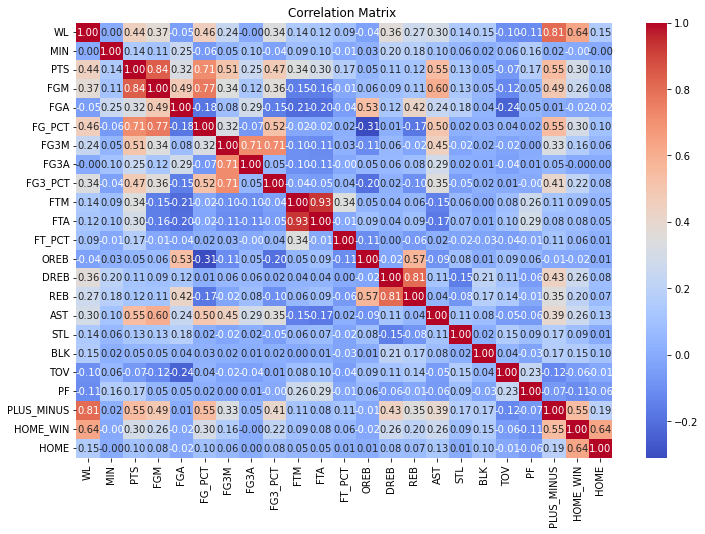

In [9]:
# Step 9: Reload the cleaned dataset (if not already loaded) / 重新加载清洗后的数据（如果尚未加载）
cleaned_file_path = "C:\\Users\joshu\Documents\\UCI\\STATS295\\nba_games_cleaned.csv"
nba_data_cleaned = pd.read_csv(cleaned_file_path)

# Step 10: Select numeric columns for correlation analysis / 选择数值型列进行相关性分析
numeric_data = nba_data_cleaned.select_dtypes(include=["number"])

# Step 11: Calculate the correlation matrix / 计算相关性矩阵
correlation_matrix = numeric_data.corr()

# Step 12: Visualize the correlation matrix / 可视化相关性矩阵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix ")
plt.show()


In [173]:
#nba_data_cleaned.head()
numeric_data.head()

,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_WIN
0,241,129,46,90,0.511,14,38,0.368,23,28,...,13,29,42,27,8,2,13,24,9.0,1
1,240,120,47,88,0.534,11,24,0.458,15,23,...,12,28,40,22,6,5,14,22,-9.0,0
2,241,116,39,87,0.448,11,39,0.282,27,36,...,16,24,40,26,5,6,12,27,-19.0,0
3,240,137,46,87,0.529,24,45,0.533,21,31,...,11,30,41,27,6,3,11,24,19.0,1
4,241,118,40,83,0.482,16,33,0.485,22,24,...,8,36,44,29,8,4,18,28,5.0,0


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure
import matplotlib.pyplot as plt

# Step 1: Load the cleaned dataset
# Step 2: Remove unnecessary covariates
columns_to_remove = ['MIN', 'PTS', 'FGM', 'FG3M', 'FTM', 'REB', 'PLUS_MINUS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'HOME_WIN']
nba_data_uncor = nba_data_cleaned.drop(columns=columns_to_remove)

# Step 3: Replace `FGA` with `FG2A`
nba_data_uncor['FG2A'] = nba_data_cleaned['FGA'] - nba_data_cleaned['FG3A']
#nba_data = nba_data.drop(columns=['FGA'])

# Step 4: Select only numerical columns for No-Tears
# Exclude categorical/text columns (e.g., TEAM_ABBREVIATION, GAME_DATE, MATCHUP, WL)
numeric_data_nt = nba_data_uncor.select_dtypes(include=[np.number])

# Step 5: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data_nt)

# Convert scaled data back to a DataFrame for compatibility with CausalNex
scaled_df = pd.DataFrame(data_scaled, columns=numeric_data_nt.columns)

# Step 6: Apply CausalNex's No-Tears algorithm
structure_model = from_pandas(scaled_df.drop(columns=['WL']))





In [33]:
from causalnex.plots import plot_structure
import networkx as nx
import io
from IPython.display import display, HTML
from pyvis.network import Network

edge_threshold = 0.15
filtered_edges = [
    (u, v, d)
    for u, v, d in structure_model.edges(data=True)
    if abs(d.get("weight", 0)) >= edge_threshold  # Keep only meaningful connections
]
nw = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white")
filtered_structure = structure_model.edge_subgraph([(u, v) for u, v, d in filtered_edges])
for node in filtered_structure.nodes:
    nw.add_node(node, label=str(node))

for u, v, d in filtered_structure.edges(data=True):
    weight = d.get("weight", 0)  # Extract weight
    print(weight)
    nw.add_edge(u, v, title=f"Weight: {weight:.2f}", value=abs(weight))  # Display weight in tooltip

nw = plot_structure(filtered_structure)
nw.set_options("""
var options = {
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -2000,
      "centralGravity": 0.01,
      "springLength": 200,
      "springConstant": 0.05,
      "damping": 0.09
    },
    "minVelocity": 0.75
  }
}
""")
nw.prep_notebook()
html_file_path = "C:\\Users\joshu\Documents\\UCI\\STATS295\\nba_network.html"
nw.generate_html(html_file_path, local=True, notebook=True)
with open(html_file_path, "w", encoding="utf-8") as f:
    f.write(nw.html)
print(f"Graph saved successfully to {html_file_path}")

1.1085171786865644
-0.1601776776941192
0.2058512820141152
0.1980797998815037
-0.19229973655906496
0.6460252023928481
-0.17236984672234534
0.2162620333859583
0.21576701397936027
0.3277477224423792
-0.18343176242988554
0.1507804463960672
0.19054258425120726
0.3232764376139421
0.26216451174961813
-0.24204911675663085
-0.28950057756251796
0.32023710753678475
0.2021964193129065
0.15660603990040517
0.17857902375160645
-0.2577363632846739
0.21212082263998594
0.2863959306410276
0.27625198882995616
-0.15771597226969236
-1.2615420146057825
-0.21477627867832674
0.4120174217413088
0.3012562788569671
0.15335963852313983
-0.32272313235715155
0.18671372473019057
Graph saved successfully to C:\Users\joshu\Documents\UCI\STATS295\nba_network.html


# Random Forest

In [26]:
scaled_df.head()

,WL,FGA,FG3A,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,HOME,FG2A
0,1.0,0.580919,1.588562,0.488188,0.632918,-0.794091,0.916031,-0.016932,-1.111628,-0.277734,0.672864,1.0,-0.748758
1,-1.0,0.313031,-0.490184,-0.155861,0.375372,-0.979705,-0.014273,-0.676960,0.076819,-0.035304,0.246112,-1.0,0.663622
2,1.0,0.179086,2.627935,0.874618,0.117826,-0.608476,0.916031,-0.676960,-0.715479,-0.762595,0.672864,1.0,-1.925741
3,-1.0,0.179086,1.737044,1.518668,1.405555,-1.722164,0.729970,-1.006973,0.472968,-0.520164,1.312992,-1.0,-1.219551
4,-1.0,0.580919,2.479453,0.101759,-0.139720,-1.165320,-0.944576,0.313081,-0.715479,-0.520164,0.886240,1.0,-1.454948


In [27]:
from sklearn.model_selection import train_test_split

x = scaled_df.drop(['WL'] , axis = 1).values
y= scaled_df['WL'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [28]:
from sklearn import metrics

kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['L', 'W'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [29]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = scaled_df.drop(['WL'] , axis = 1)
#f_importances(abs(tdt.feature_importances_), features_names, top=18)

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 73.11557788944724
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 73.09782608695652
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 70.05208333333334


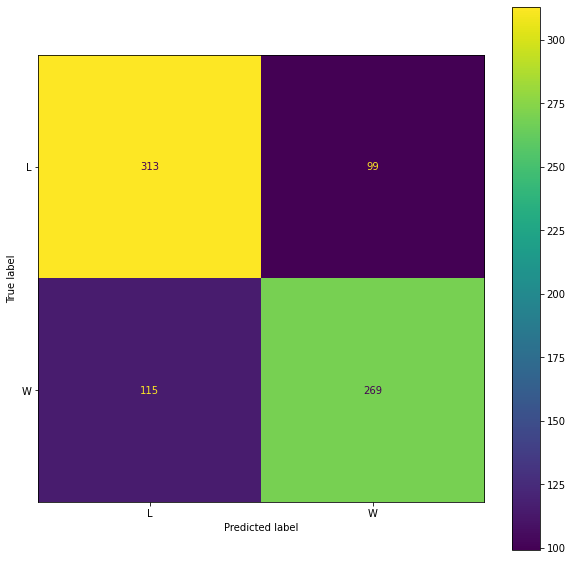

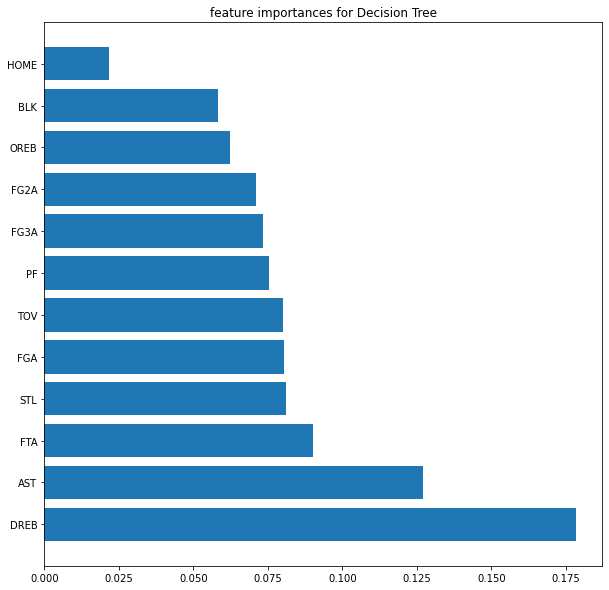

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

f_importances(abs(rf.feature_importances_), features_names)

In [34]:
from trustee import ClassificationTrustee
from sklearn.metrics import classification_report
import graphviz
from sklearn.metrics import r2_score
from sklearn import tree


def trust_report(x_test, x_train, y_train, y_test, model):
  y_pred = model.predict(x_test)
  trustee = ClassificationTrustee(expert=model)
  trustee.fit(x_train, y_train, num_iter=50, num_stability_iter=10, samples_size=0.25, verbose=True)
  dt, pruned_dt, agreement, reward = trustee.explain()
  dt_y_pred = dt.predict(x_test)

  print("Model explanation global fidelity report:")
  print(classification_report(y_pred, dt_y_pred))
  print("Model explanation score report:")
  print(classification_report(y_test, dt_y_pred))
  # Output decision tree to pdf
  dot_data = tree.export_graphviz(
      dt,
      class_names=["normal", "attack"],
      feature_names=scaled_df.drop(['WL'] , axis = 1).columns,
      filled=True,
      rounded=True,
      special_characters=True,
  )
  graph = graphviz.Source(dot_data)
  graph.render("dt_explanation")

  # Output pruned decision tree to pdf
  dot_data = tree.export_graphviz(
      pruned_dt,
      class_names=["normal", "attack"],
      feature_names=scaled_df.drop(['WL'] , axis = 1).columns,
      filled=True,
      rounded=True,
      special_characters=True,
  )
  graph = graphviz.Source(dot_data)
  graph.render("pruned_dt_explation")
  return(dt)

In [35]:
trustee_rf = trust_report(x_test, x_train, y_train, y_test, rf)

Initializing training dataset using RandomForestClassifier() as expert model
Expert model score: 1.0
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 556 points from training dataset with (2226, 2226) entries
Student model 0-0 trained with depth 13 and 86 leaves:
Student model score: 0.5862722238414456
Student model 0-0 fidelity: 0.5862722238414456
########## Inner-loop Iteration 1/50 ##########
Sampling 556 points from training dataset with (2393, 2393) entries
Student model 0-1 trained with depth 11 and 84 leaves:
Student model score: 0.5910400460962258
Student model 0-1 fidelity: 0.5910400460962258
########## Inner-loop Iteration 2/50 ##########
Sampling 556 points from training dataset with (2560, 2560) entries
Student model 0-2 trained with depth 12 and 80 leaves:
Student model score: 0.6448729500810957
Student model 0-2 fide